In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Birth weights

In [2]:
baby = Table.read_table('baby.csv')
baby

Birth Weight,Gestational Days,Maternal Age,Maternal Height,Maternal Pregnancy Weight,Maternal Smoker
120,284,27,62,100,False
113,282,33,64,135,False
128,279,28,64,115,True
108,282,23,67,125,True
136,286,25,62,93,False
138,244,33,62,178,False
132,245,23,65,140,False
120,289,25,62,125,False
143,299,30,66,136,True
140,351,27,68,120,False


In [3]:
smoking_and_birthweight = baby.select('Birth Weight', 'Maternal Smoker')
smoking_and_birthweight

Birth Weight,Maternal Smoker
120,False
113,False
128,True
108,True
136,False
138,False
132,False
120,False
143,True
140,False


In [4]:
smoking_and_birthweight.group('Maternal Smoker')

Maternal Smoker,count
False,715
True,459


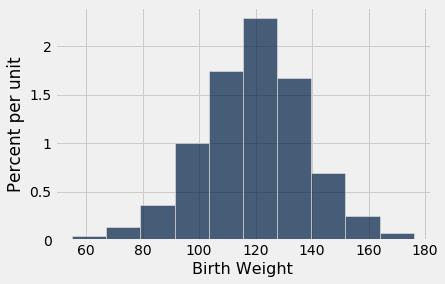

In [5]:
smoking_and_birthweight.hist('Birth Weight')

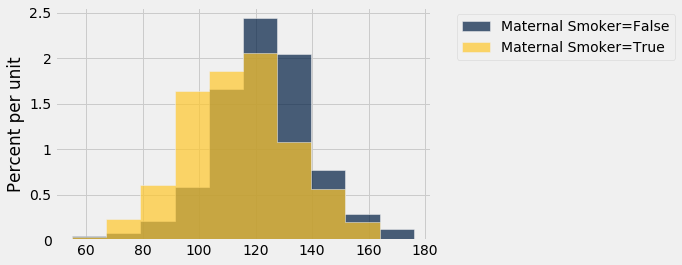

In [6]:
smoking_and_birthweight.hist('Birth Weight', group='Maternal Smoker')

In [7]:
observed_means = smoking_and_birthweight.group('Maternal Smoker', np.average)
observed_means

Maternal Smoker,Birth Weight average
False,123.085
True,113.819


In [8]:
observed_diff = observed_means.column(1).item(0) - observed_means.column(1).item(1)
observed_diff

9.266142572024918

In [9]:
def diff_between_group_means(tbl):
    means = tbl.group('Maternal Smoker', np.average)
    return means.column(1).item(0) - means.column(1).item(1)

In [10]:
# PLAN:

# Shuffle birth weights

# Assign some to group A and some to group B

# Find difference between averages of the two groups (statistic)

# Repeat

In [11]:
weights = smoking_and_birthweight.select('Birth Weight')
weights

Birth Weight
120
113
128
108
136
138
132
120
143
140


In [12]:
smoking = smoking_and_birthweight.select('Maternal Smoker')
smoking

Maternal Smoker
False
False
True
True
False
False
False
False
True
False


In [13]:
# Shuffle birth weights
shuffled_weights = weights.sample(with_replacement=False).column(0)
shuffled_weights

array([113, 120, 116, ..., 124, 146, 150])

In [14]:
# Assign some to group A and some to group B
shuffled = smoking.with_column('Shuffled weights', shuffled_weights)
shuffled

Maternal Smoker,Shuffled weights
False,113
False,120
True,116
True,129
False,138
False,129
False,100
False,129
True,132
False,117


In [15]:
# Find difference between averages of the two groups (statistic)
diff = diff_between_group_means(shuffled)
diff

0.1155354449472128

In [16]:
# Repeat
diffs = make_array()
repetitions=5000
for i in np.arange(repetitions):
    shuffled_weights = weights.sample(with_replacement=False).column(0)
    shuffled = smoking.with_column('Shuffled weights', shuffled_weights)
    diff = diff_between_group_means(shuffled)
    diffs = np.append(diffs, diff)

diffs

array([ 1.00627085, -0.24218962, -1.34398281, ..., -1.61227661,
        0.09049469, -1.20804729])

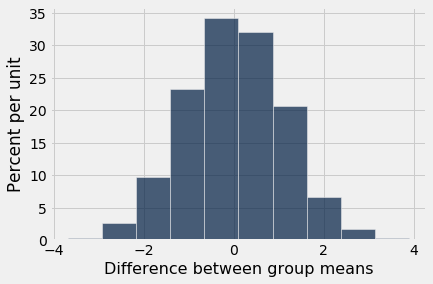

In [17]:
Table().with_column('Difference between group means', diffs).hist()

In [18]:
observed_diff

9.266142572024918

In [19]:
#P-value
empirical_P = np.count_nonzero(diffs > observed_diff) / repetitions
empirical_P

0.0

## Analyzing Randomized Controlled Trials ##

In [3]:
bta = Table.read_table('bta.csv')
bta.show()

Group,Result
Control,1
Control,1
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0
Control,0


In [21]:
bta.group('Group', sum)

Group,Result sum
Control,2
Treatment,9


In [22]:
bta.group('Group', np.average)

Group,Result average
Control,0.125
Treatment,0.6


In [23]:
bta.group('Group', np.average).column(1)

array([0.125, 0.6  ])

In [24]:
abs(0.125 - 0.6)

0.475

In [25]:
def distance_between_group_proportions(tbl):
    proportions = tbl.group('Group', np.average).column(1)
    return abs(proportions.item(1) - proportions.item(0))

In [26]:
observed_distance = distance_between_group_proportions(bta)
observed_distance

0.475

In [27]:
labels = bta.select('Group')
results = bta.select('Result')

In [28]:
# Repeat
distances = make_array()
for i in np.arange(10000):
    shuffled_results = results.sample(with_replacement=False).column(0)
    simulated = labels.with_column('Shuffled results', shuffled_results)
    distance = distance_between_group_proportions(simulated)
    distances = np.append(distances, distance)

distances

array([0.04166667, 0.21666667, 0.21666667, ..., 0.04166667, 0.04166667,
       0.04166667])

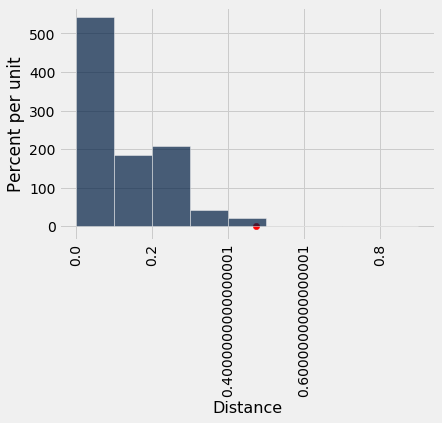

In [29]:
Table().with_column('Distance', distances).hist(bins = np.arange(0, 1, 0.1))
plots.scatter(observed_distance, 0, color='red', s=40);

In [30]:
#P-Value
sum(distances >= observed_distance)/10000

0.0088